# ERA vs NCEP

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from global_land_mask import globe
import netCDF4
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250

In [15]:
path1 = '/media/rakshith/Seagate Expansion Drive/mraks/'
e = "lhtfl.nc" #this is the evaporation rate
k = "prate.nc" 
list1 = [e,k]
datasets1 = [path1 + s for s in list1]
ncep = xr.open_mfdataset(datasets1)

In [16]:
year='2015'

In [17]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
era = xr.open_dataset(h)

In [18]:
path = '/media/rakshith/Seagate Expansion Drive/IMD' #Daily dataset 
fi = '/RFone_imd_rf_1x1_*.nc'
imd=xr.open_mfdataset(path+fi)

In [19]:
ncep2 = ncep.sel(time=year, lon=slice(70, 90), lat=slice(30, 10))
era2 = era.sel(time=year)
imd2 = imd.sel(TIME=year, LONGITUDE=slice(70, 90), LATITUDE=slice(10, 30))

In [20]:
#Mask for NCEP
lon_grid, lat_grid = np.meshgrid(ncep2.lon, ncep2.lat) #creating a land sea mask
ncepmask = globe.is_land(lat_grid, lon_grid)
#Mask for ERA
lon_grid, lat_grid = np.meshgrid(era2.longitude, era2.latitude) #creating a land sea mask
eramask = globe.is_land(lat_grid, lon_grid)
#Mask for IMD
lon_grid, lat_grid = np.meshgrid(imd2.LONGITUDE, imd2.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

In [21]:
ncep3 = 86400*ncep2.prate.where(ncepmask>0).mean(dim=['lon', 'lat'])
era3 = 86400*era2.mtpr.where(eramask>0).mean(dim=['longitude', 'latitude'])
imd3 = imd2.RAINFALL.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE'])

In [22]:
monncep = ncep3.groupby('time.month').mean().squeeze()
monera = era3.groupby('time.month').mean().squeeze()
monimd = imd3.groupby('TIME.month').mean().squeeze()

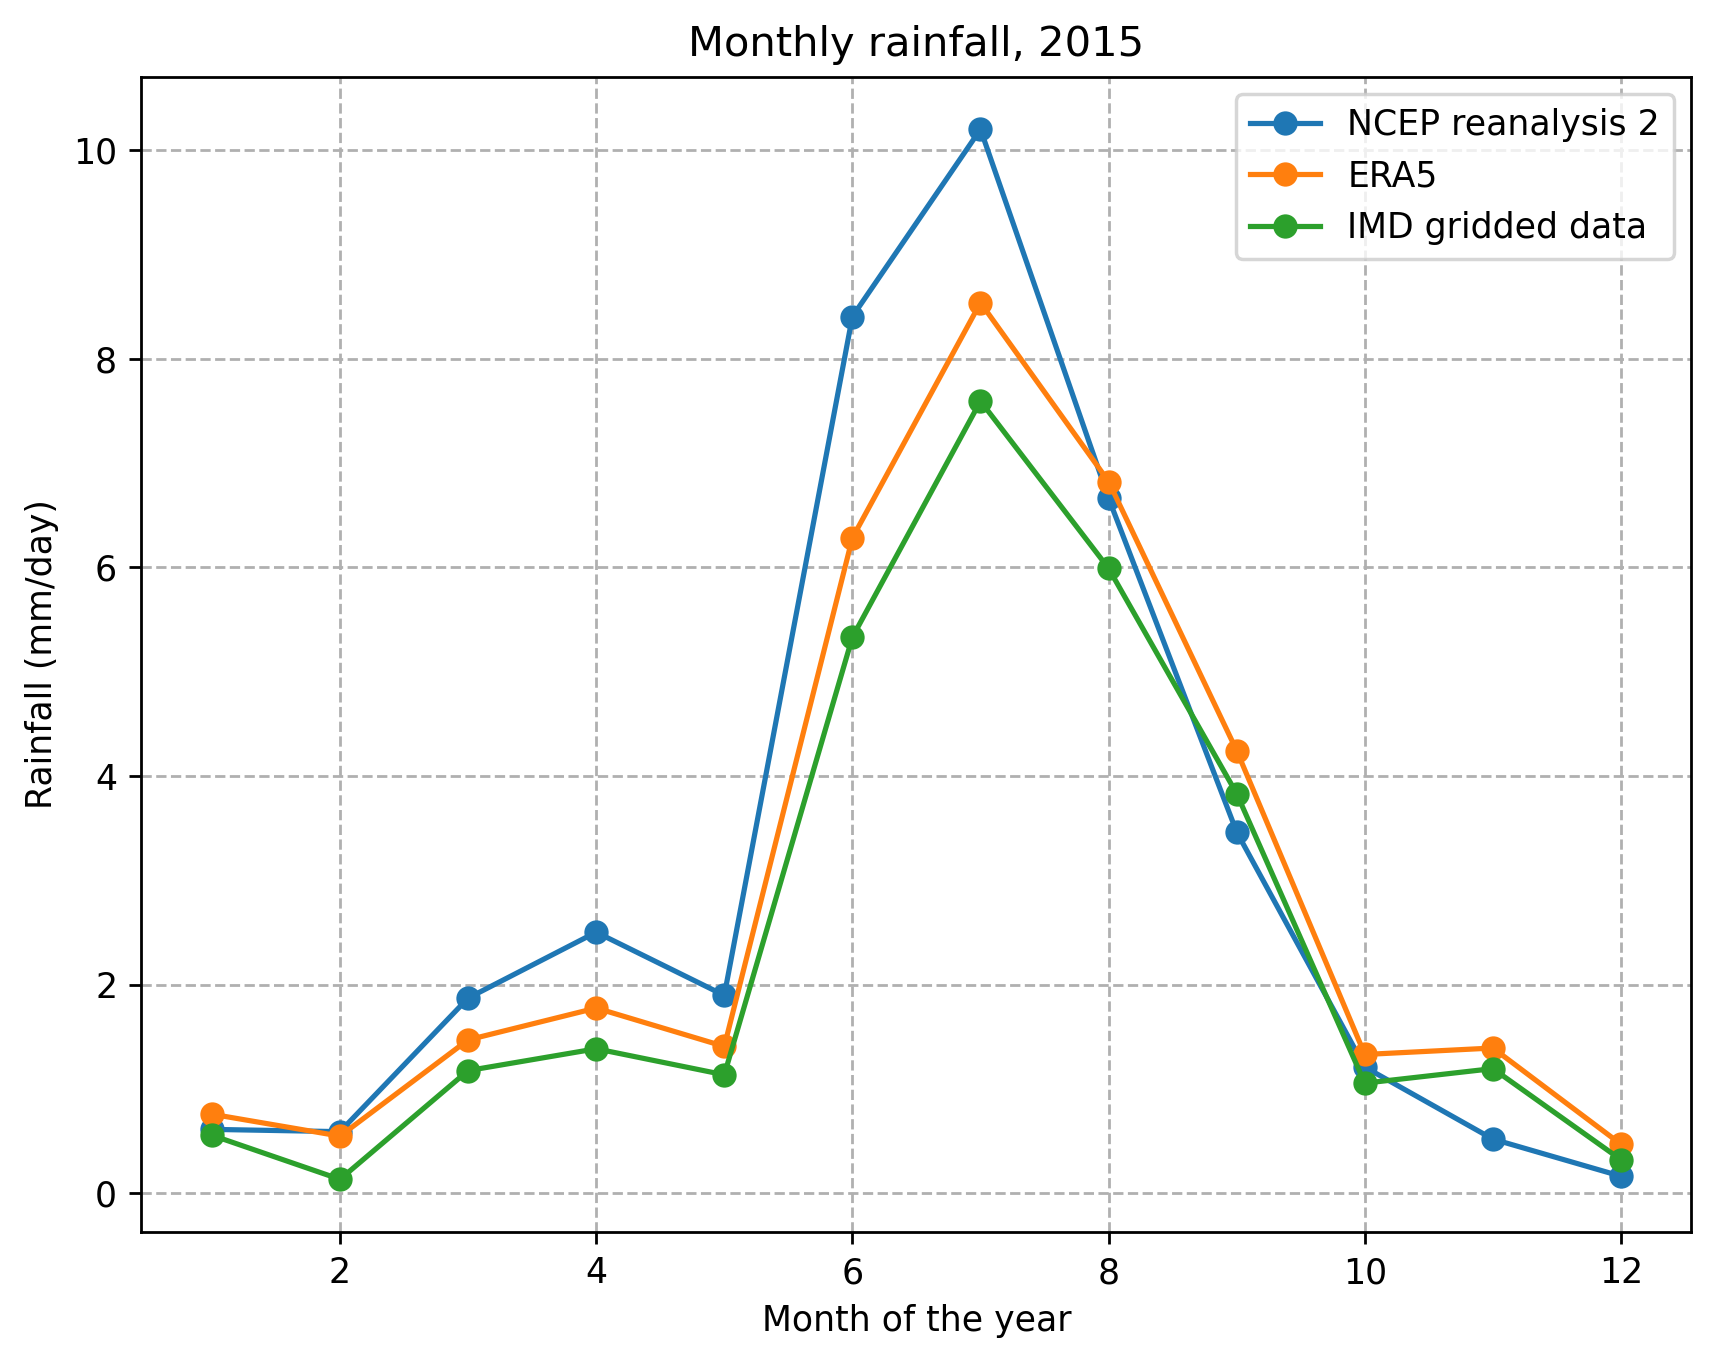

In [29]:
plot_settings = {'marker':'o'}
plt.rcParams['figure.figsize'] = [8,6]
monncep.plot(label='NCEP reanalysis 2', **plot_settings)
monera.plot(label='ERA5', **plot_settings)
monimd.plot(label='IMD gridded data', **plot_settings)
plt.title("Monthly rainfall, "+year)
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Month of the year')
plt.grid(linestyle = '--')
plt.legend()

In [30]:
l = "pr_wtr.nc"
pwat = xr.open_dataset(path1+l)

In [31]:
yncep = pwat.sel(time=slice('1979', '2021'), lon=slice(70, 90), lat=slice(30, 10))
yera = era.sel(time=slice('1979', '2021'))

In [32]:
lon_grid, lat_grid = np.meshgrid(yncep.lon, yncep.lat)
pwatmask = globe.is_land(lat_grid, lon_grid)

In [33]:
ncep3 = yncep.pr_wtr.where(pwatmask>0).mean(dim=['lon', 'lat'])
era3 = yera.tcwv.where(eramask>0).mean(dim=['longitude', 'latitude'])

# ERA vs IMD vs NCEP

In [2]:
path = '/media/rakshith/Seagate Expansion Drive/IMD' #Daily dataset
fi = '/RFone_imd_rf_1x1_*.nc'
imd=xr.open_mfdataset(path+fi)

a = '/media/rakshith/Seagate Expansion Drive/mraks/ERA Prec, Pwat all region.nc'
era = xr.open_dataset(a)

In [3]:
lat1, lat2, lon1, lon2 = 10, 30, 70, 90
imd2 = imd.sel(LATITUDE=slice(lat1,lat2), LONGITUDE=slice(lon1,lon2))

months = imd2.TIME.dt.month.isin(range(6, 10))
imd3 = imd2.sel(TIME=months)
imd3 = imd3.groupby('TIME.year').mean('TIME')

In [5]:
lat1, lat2, lon1, lon2 = 30, 10, 70, 90
era2 = era.sel(time=slice('1940', '2021'), latitude=slice(lat1,lat2), longitude=slice(lon1,lon2))

months = era2.time.dt.month.isin(range(6, 10))
era3 = era2.sel(time=months)
era3 = era3.groupby('time.year').mean('time')

In [6]:
#Mask for ERA
lon_grid, lat_grid = np.meshgrid(era2.longitude, era2.latitude) #creating a land sea mask
eramask = globe.is_land(lat_grid, lon_grid)
#Mask for IMD
lon_grid, lat_grid = np.meshgrid(imd2.LONGITUDE, imd2.LATITUDE) #creating a land sea mask
imdmask = globe.is_land(lat_grid, lon_grid)

In [7]:
imd4 = imd3.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE']) #Spatial averaging over land points only
era4 = 86400*era3.where(eramask>0).mean(dim=['longitude', 'latitude'])

In [8]:
b = '/media/rakshith/Seagate Expansion Drive/mraks/prate.nc'
ncep = xr.open_dataset(b)

In [9]:
lat1, lat2, lon1, lon2 = 30, 10, 70, 90
ncep2 = ncep.sel(time=slice('1979', '2021'), lat=slice(lat1,lat2), lon=slice(lon1,lon2))

months = ncep2.time.dt.month.isin(range(6, 10))
ncep3 = ncep2.sel(time=months)
ncep3 = ncep3.groupby('time.year').mean('time')

In [10]:
#Mask for NCEP
lon_grid, lat_grid = np.meshgrid(ncep2.lon, ncep2.lat) #creating a land sea mask
ncepmask = globe.is_land(lat_grid, lon_grid)

ncep4 = 86400*ncep3.where(ncepmask>0).mean(dim=['lon', 'lat'])

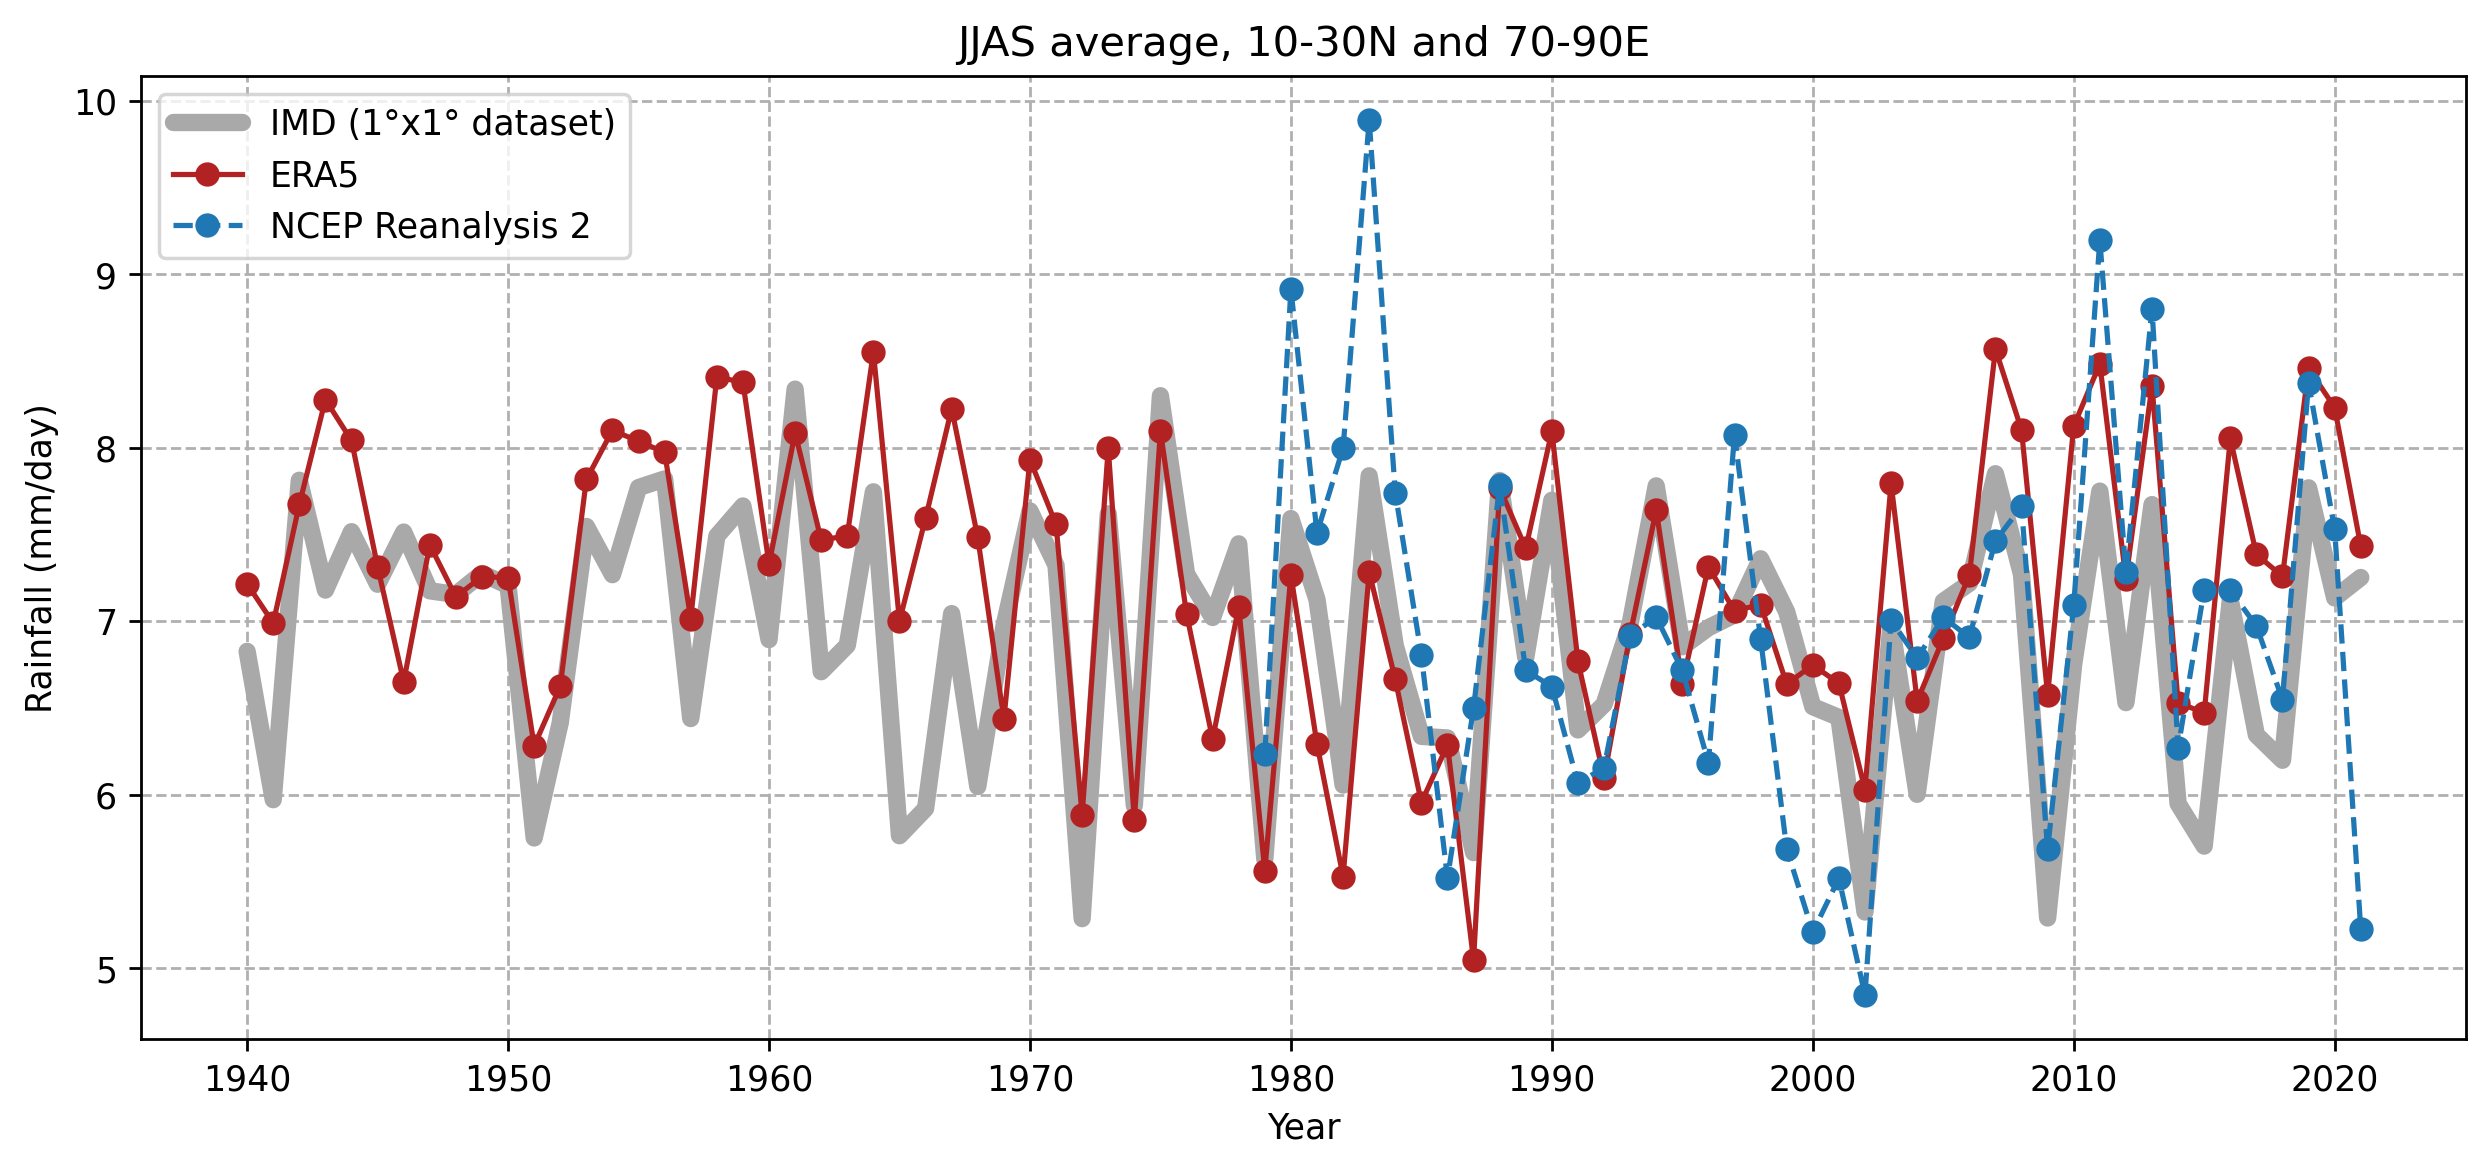

In [14]:
plt.rcParams['figure.figsize'] = [12, 5]
imd4.RAINFALL.plot(linestyle='-', label='IMD (1\u00b0x1\u00b0 dataset)', c='darkgray', lw=5, solid_capstyle='round')
era4.mtpr.plot(linestyle='-', marker='o', label='ERA5', c='firebrick')
ncep4.prate.plot(linestyle='--', marker='o', label='NCEP Reanalysis 2')
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Year')
plt.legend()
plt.title('JJAS average, 10-30N and 70-90E')
plt.grid(linestyle='--')

In [13]:
MON = imd2.resample(TIME="1M").mean()
imdmon = MON.where(imdmask>0).mean(dim=['LONGITUDE', 'LATITUDE'])
eramon = 86400*era2.where(eramask>0).mean(dim=['longitude', 'latitude'])

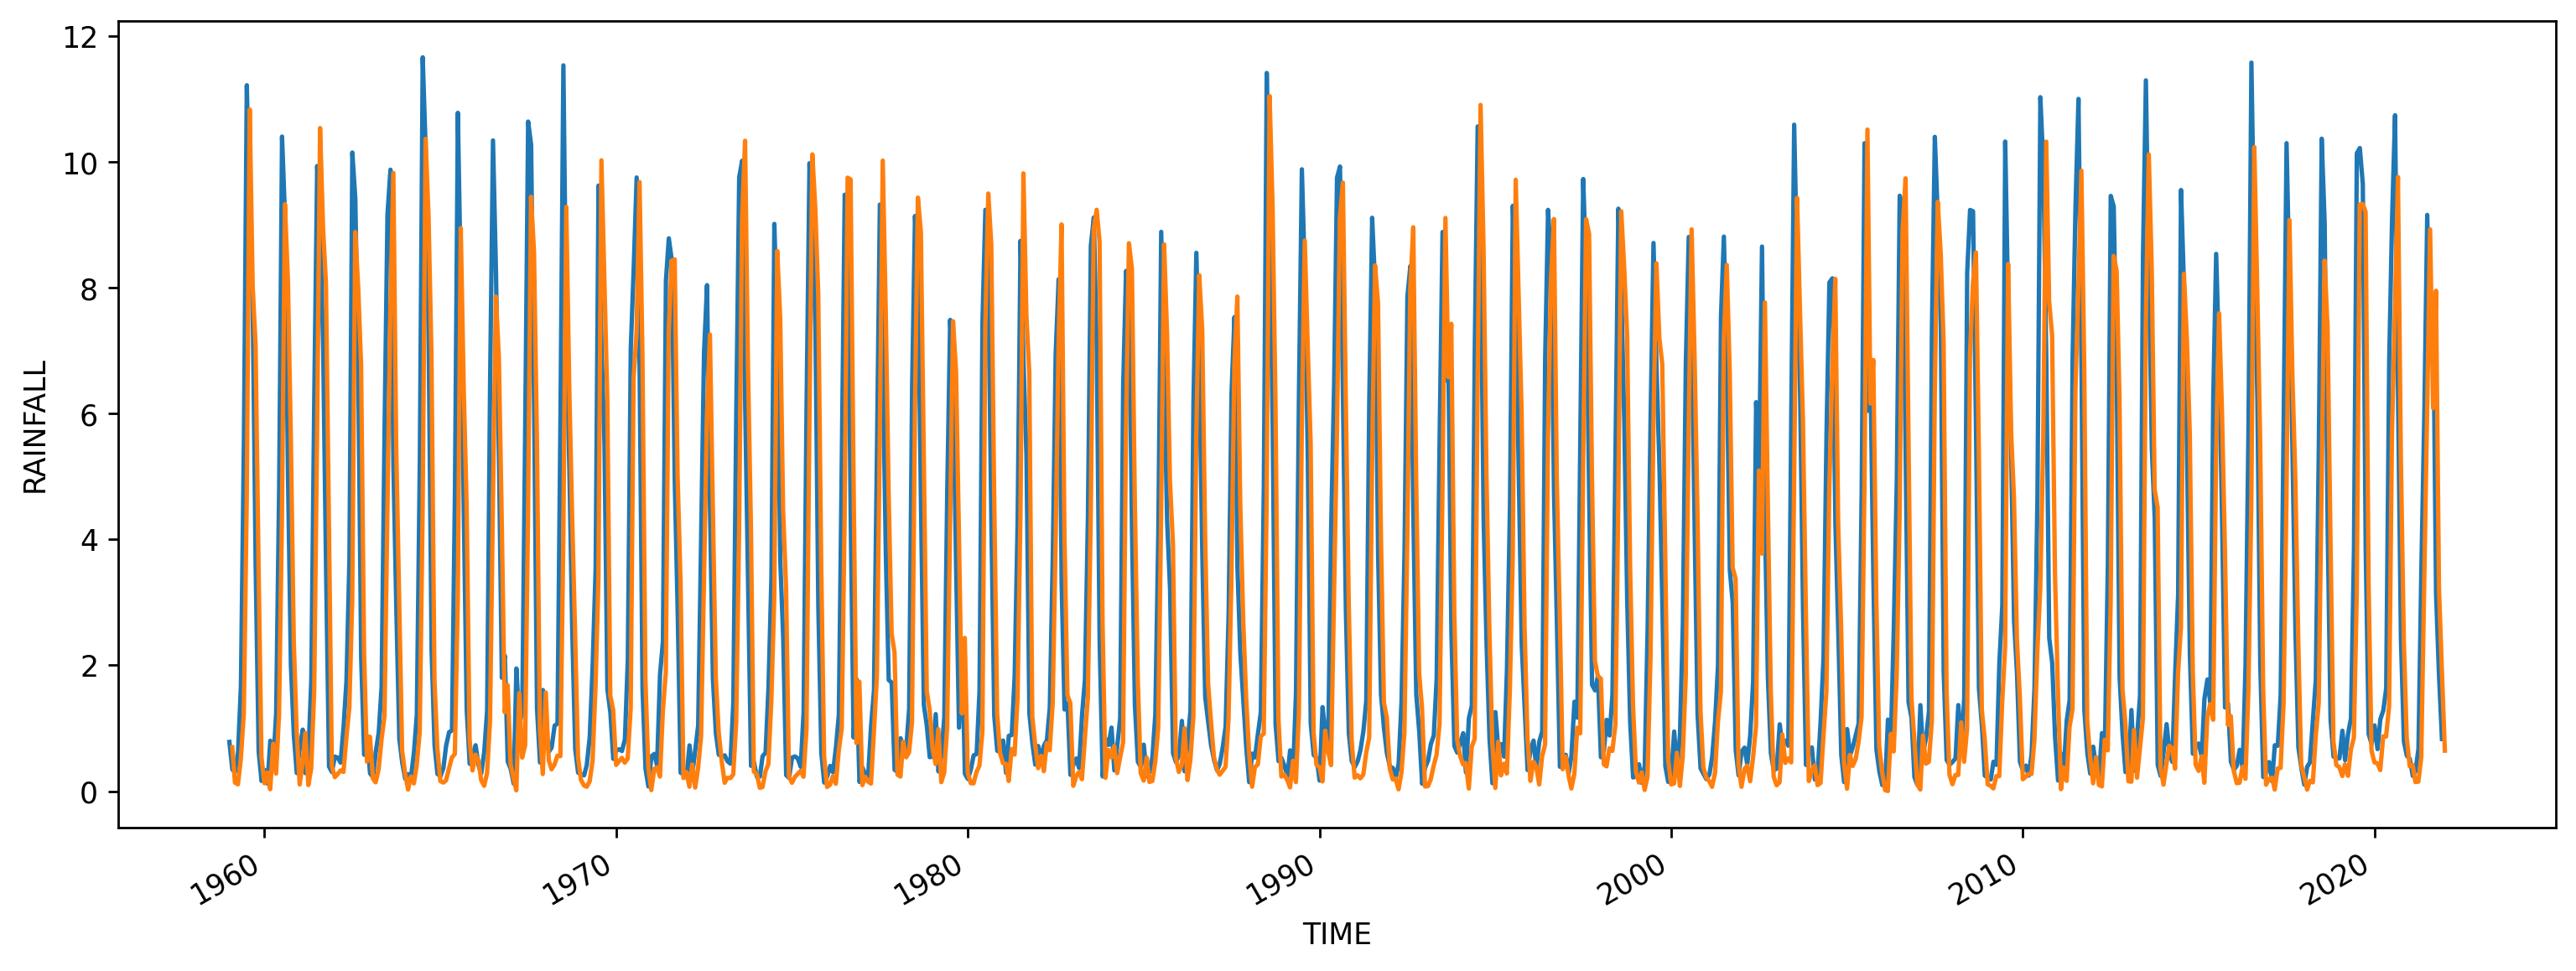

In [12]:
plt.rcParams['figure.figsize'] = [15, 5]
eramon.mtpr.plot()
imdmon.RAINFALL.plot()

IndexError: index 62 is out of bounds for axis 0 with size 62

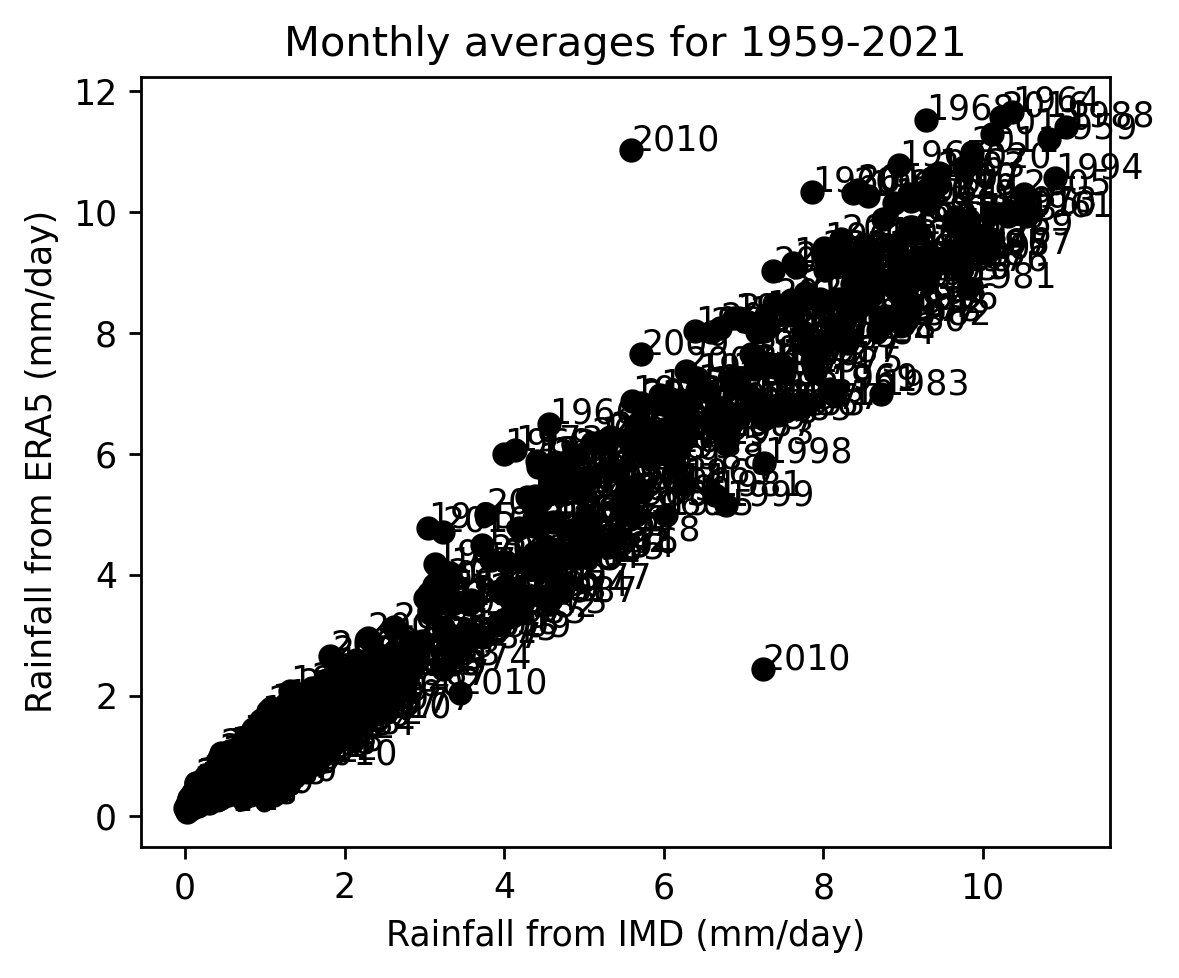

In [17]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.scatter(imdmon.RAINFALL, eramon.mtpr, c='black')
plt.xlabel('Rainfall from IMD (mm/day)')
plt.ylabel('Rainfall from ERA5 (mm/day)')
plt.title('Monthly averages for 1959-2021')

time = np.arange(1959, 2021, 1)

for i, (x, y) in enumerate(zip(imdmon.RAINFALL.values, eramon.mtpr.values)):
    plt.annotate(time[int(i/12)], (x,y))

Text(0.5, 1.0, 'JJAS average for 1959-2021')

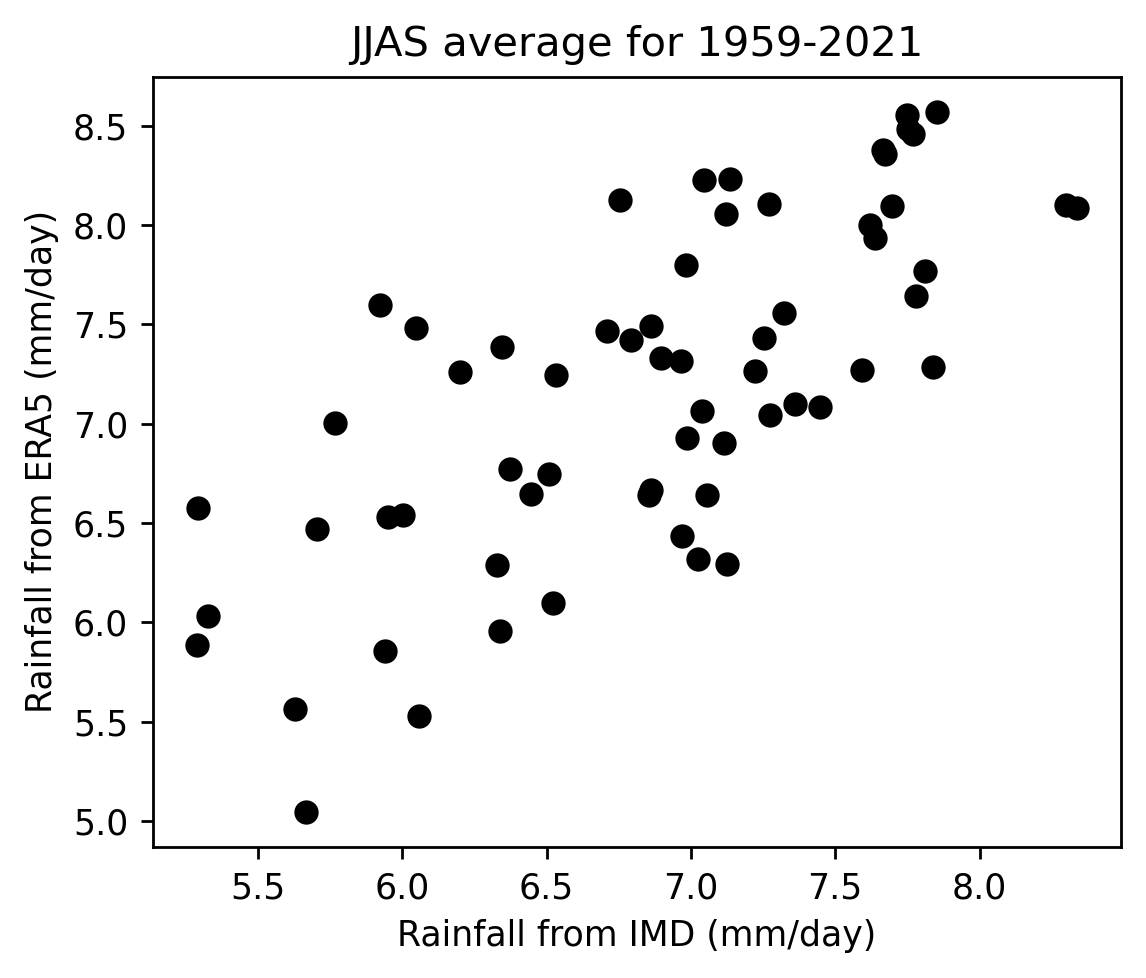

In [49]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.scatter(imd4.RAINFALL, era4.mtpr, c='black')
plt.xlabel('Rainfall from IMD (mm/day)')
plt.ylabel('Rainfall from ERA5 (mm/day)')
plt.title('JJAS average for 1959-2021')

In [50]:
np.corrcoef(imd4.RAINFALL, era4.mtpr)

array([[1.        , 0.71997453],
       [0.71997453, 1.        ]])

In [75]:
year='2010'
imdlier = imdmon.sel(TIME='2010')
eralier = eramon.sel(time='2010')
monncep = ncep2.prate.sel(time=year)
nceplier = 86400*monncep.where(ncepmask>0).mean(dim=['lon', 'lat'])

data1 = eralier.groupby('time.month').mean().squeeze()
data2 = imdlier.groupby('TIME.month').mean().squeeze()
data3 = nceplier.groupby('time.month').mean().squeeze()

In [45]:
X = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

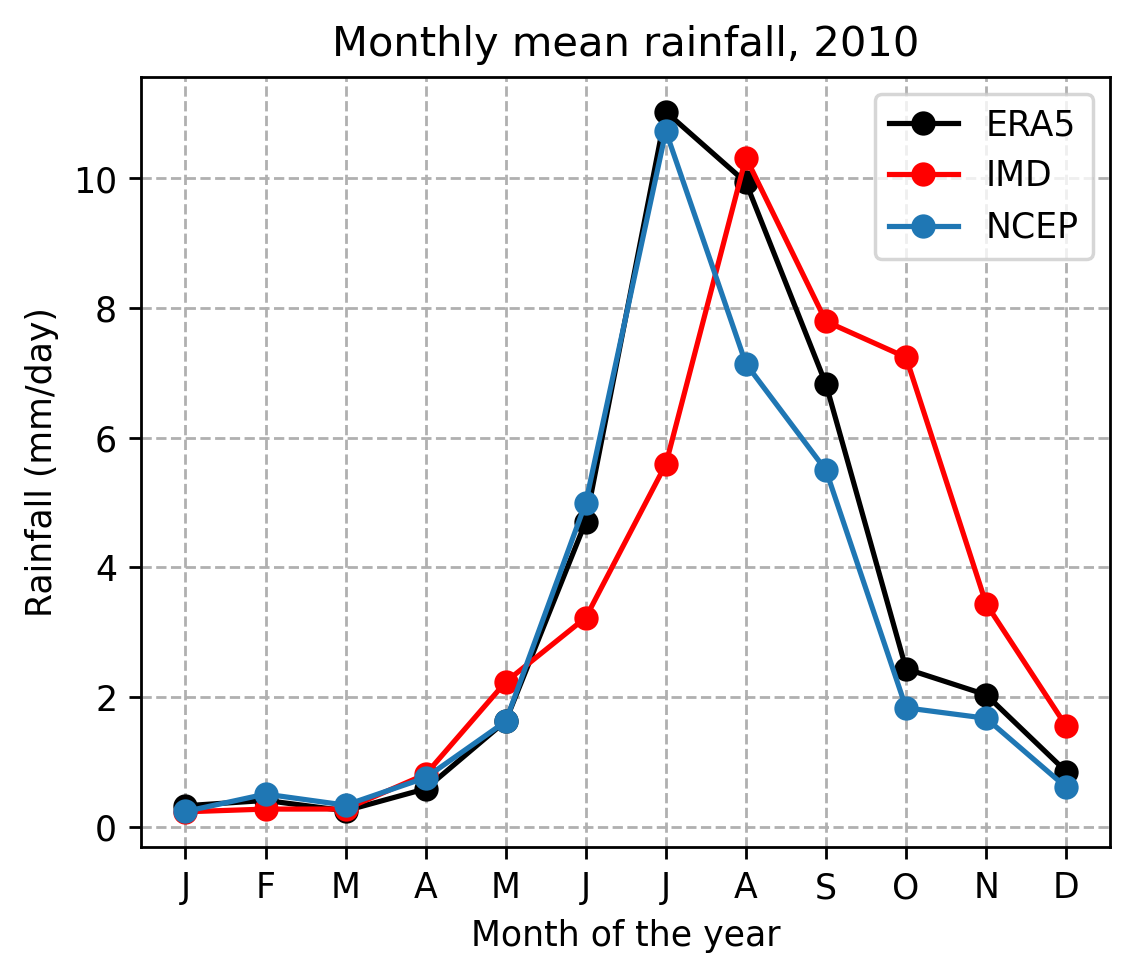

In [76]:
data1.mtpr.plot(c='black', label='ERA5', marker='o')
data2.RAINFALL.plot(c='r', label='IMD', marker='o')
data3.plot(label='NCEP', marker='o')
plt.ylabel('Rainfall (mm/day)')
plt.xlabel('Month of the year')
plt.title('Monthly mean rainfall, ' + year)
plt.xticks(data1.month,X)
plt.grid(linestyle = '--')
plt.legend()
plt.show()

In [97]:
c ='/media/rakshith/Windows/Users/mraks/ERBE.nc'
#ds3 = xr.open_dataset(c)
ds2 = netCDF4.Dataset(c)

In [98]:
ds2['T']

<class 'netCDF4._netCDF4.Variable'>
float32 T(T)
    standard_name: time
    pointwidth: 1.0
    calendar: 360
    gridtype: 0
    units: months since 1960-01-01
unlimited dimensions: 
current shape = (64,)
filling on, default _FillValue of 9.969209968386869e+36 used

# ERA vs CERES

In [3]:
k = '/media/rakshith/Seagate Expansion Drive/mraks/CERES.nc'
ceres = xr.open_dataset(k)

In [4]:
ceres

<xarray.Dataset>
Dimensions:          (lon: 360, lat: 180, time: 265)
Coordinates:
  * lon              (lon) float32 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat              (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time             (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2022-03-15
Data variables:
    toa_sw_all_mon   (time, lat, lon) float32 ...
    toa_lw_all_mon   (time, lat, lon) float32 ...
    toa_net_all_mon  (time, lat, lon) float32 ...
Attributes:
    title:        CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Monthly...
    institution:  NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:  CF-1.4
    comment:      Climatology from 07/2005 to 06/2015
    version:      Edition 4.1; Release Date May 28, 2019
    DOI:          10.5067/TERRA-AQUA/CERES/EBAF-TOA_L3B004.1

In [27]:
jjas = ceres.time.dt.month.isin(range(6, 10)) #JJAS
clim1 = ceres.sel(time=jjas, lat=slice(10, 30), lon=slice(70, 90))

lon_grid, lat_grid = np.meshgrid(clim1.lon, clim1.lat)
mask1 = globe.is_land(lat_grid, lon_grid)

clim2 = clim1.where(mask1>0).mean(dim=['lat', 'lon'])

In [28]:
cJuly = clim2.time.dt.month.isin(range(7, 8))

In [29]:
Qnetceres = clim2.toa_net_all_mon

In [30]:
h = '/media/rakshith/Seagate Expansion Drive/mraks/TGMS ERA 1959-2021, India only.nc'
era = xr.open_dataset(h)

In [31]:
lon_grid, lat_grid = np.meshgrid(era.longitude, era.latitude)
mask2 = globe.is_land(lat_grid, lon_grid)

In [32]:
jjas = era.time.dt.month.isin(range(6, 10)) #JJAS
clim3 = era.sel(time=jjas)
clim4 = clim3.where(mask2>0).mean(dim=['latitude', 'longitude'])

In [57]:
clim4 = clim4.sel(time=slice('2000', '2021'))

In [58]:
eJuly = clim4.time.dt.month.isin(range(7, 8))

In [59]:
Qnetera = clim4.mtnswrf + clim4.mtnlwrf

In [60]:
X = np.arange(2000, 2022, 1)

Text(0.5, 1.0, 'Month: July')

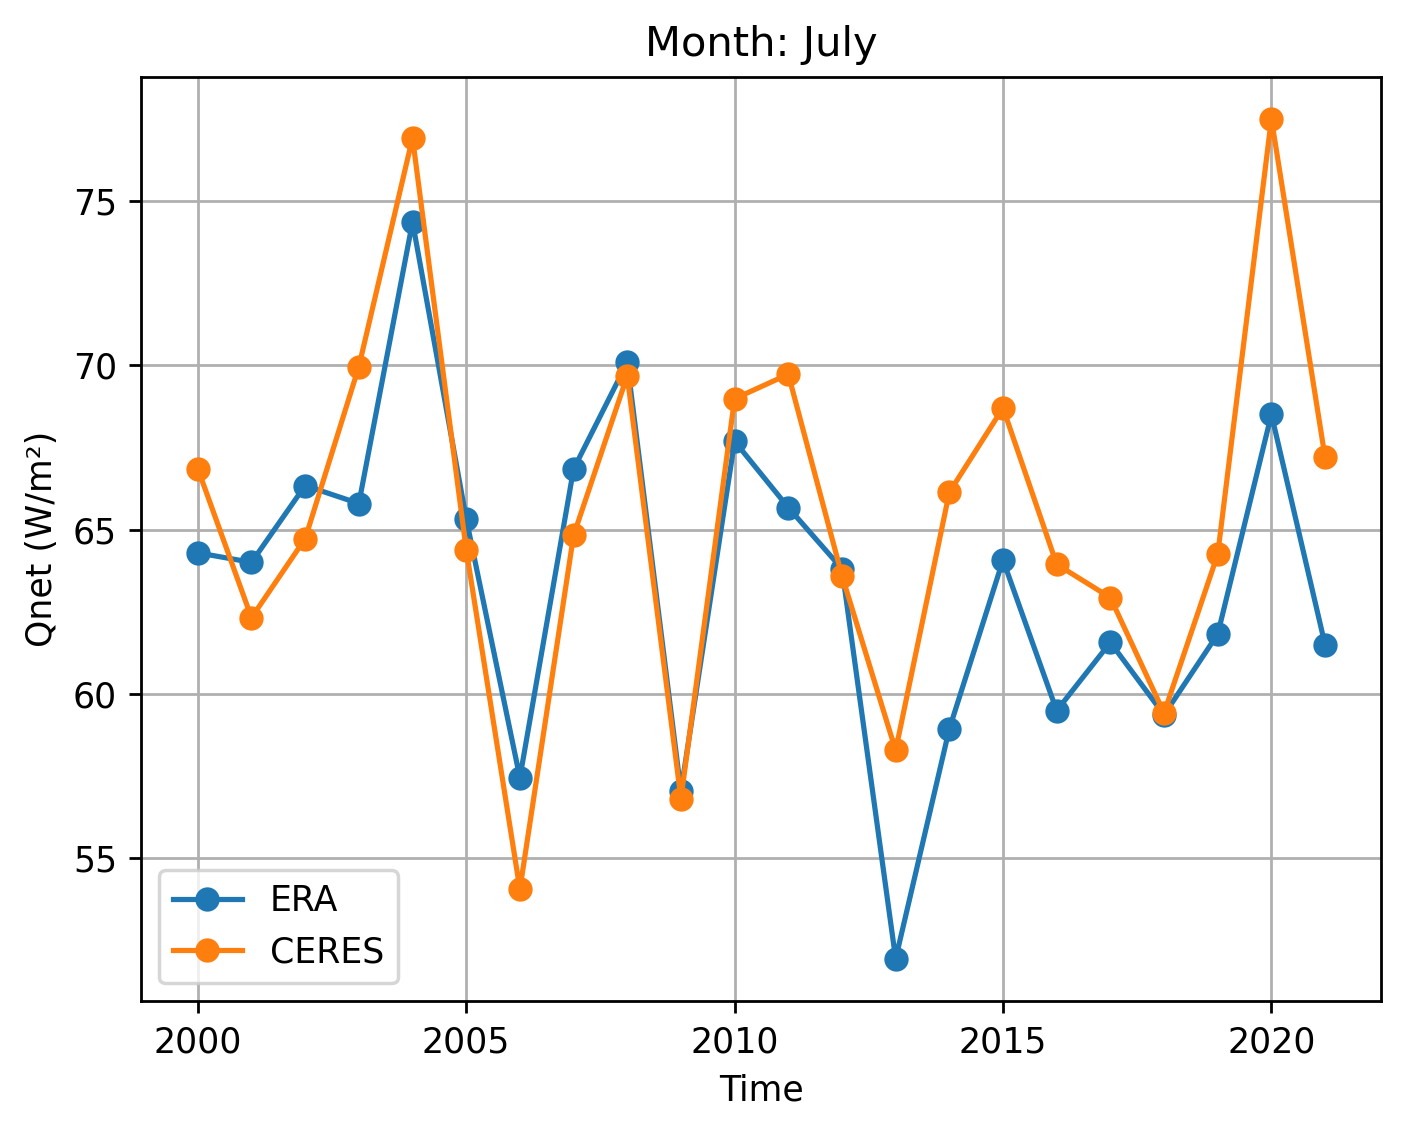

In [64]:
plt.plot(X, Qnetera.sel(time=eJuly), marker='o', label='ERA')
plt.plot(X, Qnetceres.sel(time=cJuly), marker='o', label='CERES')
plt.xlabel('Time')
plt.ylabel('Qnet (W/m\u00b2)')
plt.legend()
plt.grid()
plt.title('Month: July')

Text(0.5, 1.0, 'JJAS average')

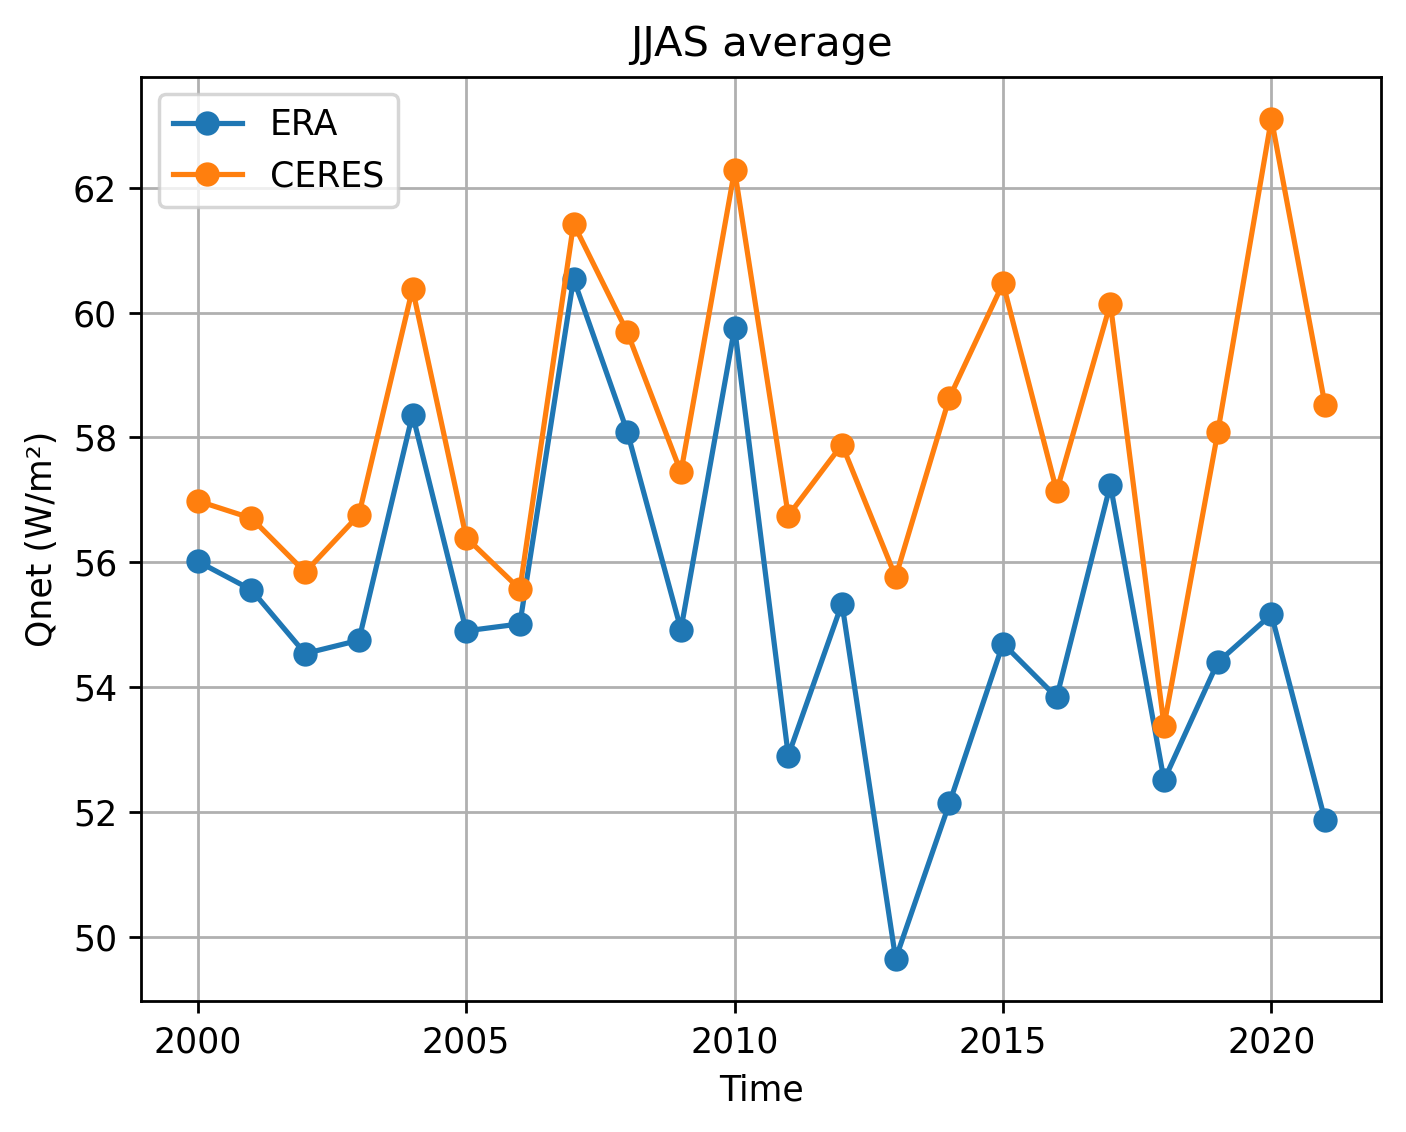

In [72]:
Qnetera.groupby('time.year').mean('time').plot(marker='o', label='ERA')
Qnetceres.groupby('time.year').mean('time').plot(marker='o', label='CERES')
plt.xlabel('Time')
plt.ylabel('Qnet (W/m\u00b2)')
plt.legend()
plt.grid()
plt.title('JJAS average')